<a href="https://colab.research.google.com/github/resulcaliskan/projects/blob/master/keras_mnist_hand_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1-import necessary libraies

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### 2- prepare the data

In [3]:
# data parameters
num_classes = 10
input_shape = (28,28,1)

# the data split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale image
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# make sure image shapes are (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print(x_train.shape[0], " train samples")
print(x_test.shape[0], " test samples")

# convert labels to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)
60000  train samples
10000  test samples


### 3- build the model

In [21]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(units=64, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(units=num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 3200)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)              

### 4-train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_batch_size=0,1)

In [22]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 90s 214ms/step - loss: 0.3420 - accuracy: 0.8921 - val_loss: 0.0621 - val_accuracy: 0.9822
Epoch 2/10
422/422 [==============================] - 90s 213ms/step - loss: 0.1155 - accuracy: 0.9658 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 3/10
422/422 [==============================] - 93s 221ms/step - loss: 0.0893 - accuracy: 0.9743 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 4/10
422/422 [==============================] - 92s 218ms/step - loss: 0.0715 - accuracy: 0.9794 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 5/10
422/422 [==============================] - 92s 218ms/step - loss: 0.0617 - accuracy: 0.9817 - val_loss: 0.0341 - val_accuracy: 0.9910
Epoch 6/10
422/422 [==============================] - 90s 213ms/step - loss: 0.0546 - accuracy: 0.9837 - val_loss: 0.0376 - val_accuracy: 0.9910
Epoch 7/10
422/422 [==============================] - 90s 213ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0288 - val_ac

### 5-evaluate the trained model

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022517051547765732
Test accuracy: 0.9926000237464905


**checking a random test image**

In [30]:
sample = x_test[27].reshape(28,28)
y_test[27]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

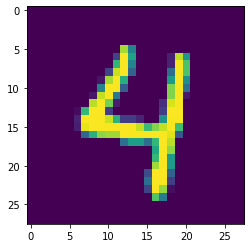

In [31]:
import matplotlib.pyplot as plt
plt.imshow(sample)
plt.show()

In [39]:
prediction = model.predict(sample.reshape(1,28,28,1))
print(prediction.round())

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
